In [1]:
import dlem.util as util
from dlem import load_reader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from dlem.feature_extraction import train_extractor

In [3]:
import torch

In [4]:
res = 10000
window_size = 2000000//res
stride = 150

In [5]:
data = load_reader("datareader_cooler")(
    "../../../loopExtraction/data/4DNFI9GMP2J8.mcool",
    res,
    window_size,
    stride,
    chrom_subset=["chr10"],
)

In [6]:
len(data)

88

In [7]:
patch = util.diagonal_normalize(np.log(data[4][0][np.newaxis]))[0]

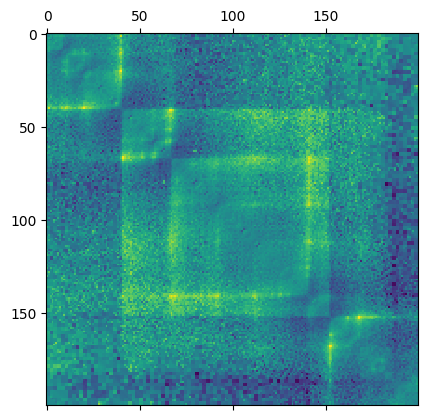

In [8]:
plt.matshow(patch)

In [9]:
def weighted_mse(output, target):
    loss = torch.mean((output - target)**2 * torch.exp(target))
    return loss

In [10]:
best_loss_model, best_corr_model, arr_loss, arr_corr=train_extractor(patch,
                                                                     150,
                                                                     0.5,
                                                                     "stalling_free_form",
                                                                     1,
                                                                     weighted_mse,
                                                                     25,
                                                                     100,
                                                                     "cuda",
                                                                     do_print=True)

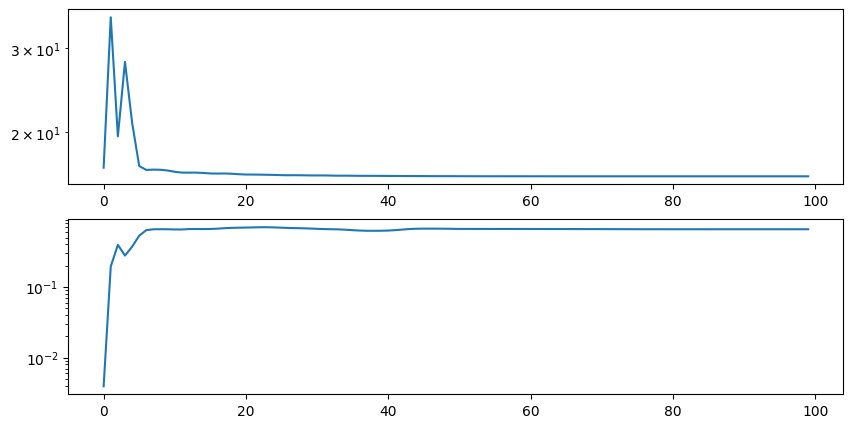

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes[0].set_yscale('log')
axes[0].plot(arr_loss)
axes[1].set_yscale('log')
axes[1].plot(arr_corr)

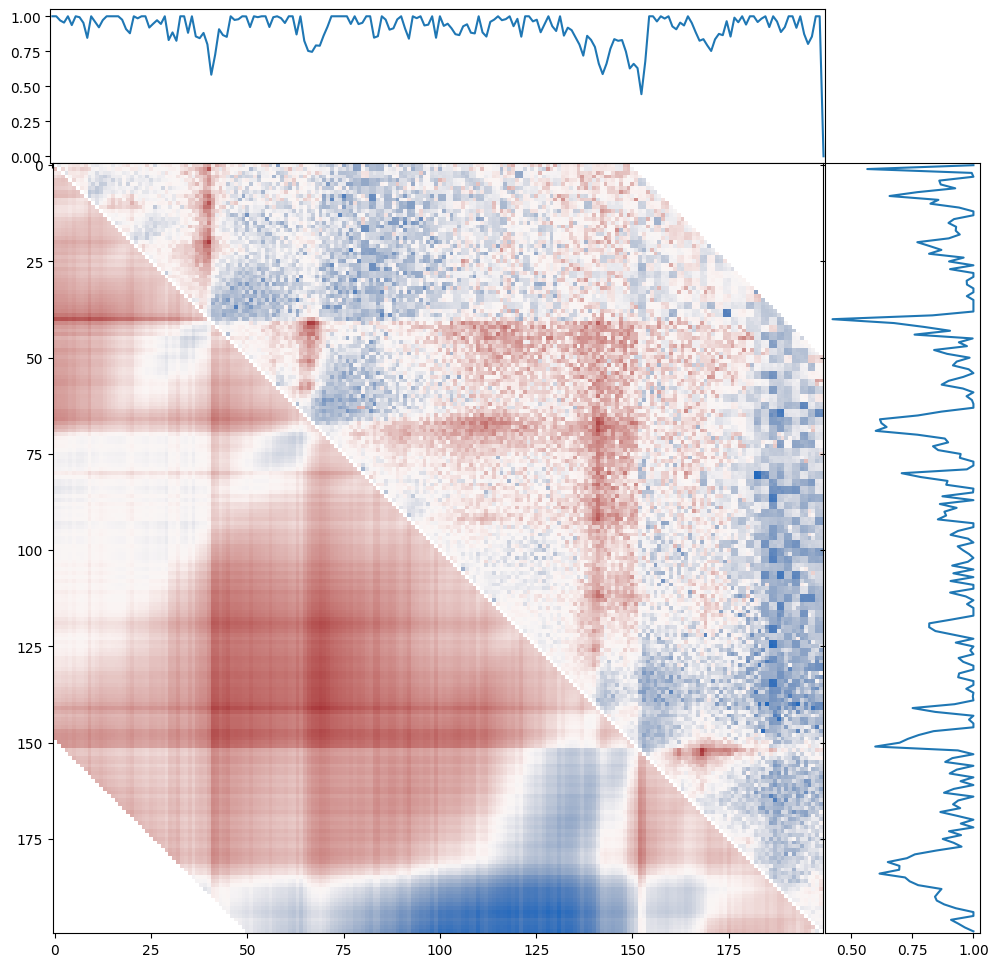

In [12]:
best_corr_pred = best_corr_model.contact_map_prediction(
        torch.ones((1, patch.shape[0]), device=torch.device("cuda")) * patch.shape[0]
    ).detach().cpu().numpy()
params = best_corr_model.return_parameters()
best_corr_pred = util.diagonal_normalize(np.log(best_corr_pred))
best_corr_pred = best_corr_pred[0]
util.plot_results(patch,
                  best_corr_pred,
                  params,
                  ignore_i=1,
                  ignore_i_off=150,
                  cmap="vlag")

In [13]:
for i in range(patch.shape[0]):
    print(best_corr_model.return_stalling(i).detach().cpu().numpy())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 

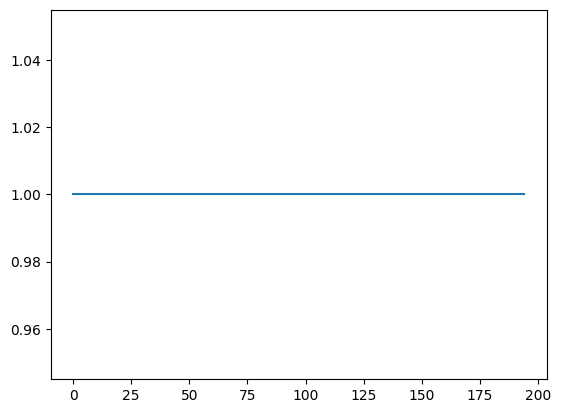

In [14]:
plt.plot(best_loss_model.return_stalling(4).detach().cpu().numpy())